# Introduction to Classification Evaluation I

-----

After building a classification model, there're various ways to evaluate the model. In the previous lessons, we've used classification report which includes precision, recall and f1-score on each classes, and confusion matrix to measure the performance of the classification models.

In this notebook, we will explain these evaluation technics in more detail.

We will demonstrate the classification metrics with adult income data from UCI data repository. We will also have 2 case studies on how to improve our model for different situations.

-----


## Table of Contents

[Evaluation Metrics for Classification](#Evaluation-Metrics-for-Classification)
- [Accuracy Score](#Accuracy-Score)
- [Classification Report](#Classification-Report)
- [Confusion Matrix](#Confusion-Matrix)
- [Metrics Calculation](#Metrics-Calculation)
- [Python Code to Plot Confusion Matrix](#Python-Code-to-Plot-Confusion-Matrix)

[Classification Metrics Case Study](#Classification-Metrics-Case-Study)
- [Case Study 1](#Case-Study-1)
- [Case Study 2](#Case-Study-2)

-----
Before proceeding with the _Formalism_ section of this Notebook, we first have our standard notebook setup code.

-----

In [1]:
# Set up Notebook
%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

-----
[[Back to TOC]](#Table-of-Contents)

## Evaluation Metrics for Classification

All classification metrics are calculated with the predicted values and the observed values. The predicted values are generated by applying the classification model on the testing dataset and the observed values are the true outcome of testing dataset.

### Accuracy Score

Accuracy score is the starting point of classification evaluation. It is calculated as the proportion of correct predictions over all predictions. For example, if a classifcation model yields 100 predictions, 80 out of 100 are predicted correctly, then the accuracy score will be 0.8 or 80%.

The scikit learn metrics module has a function `accuracy_score(true_label, predicted_label)` that returns the accuracy score. 

The accuracy score is very intuitive but not always reliable. Consider an example of a classification model that's used to predit a rare dicease that about 1% of people have. A zero model which always returns the majority class as prediction will classify all data points as negative. Since 99% of the time the true output is negative, the zero model will achieve accuracy score 99%. But this doesn't mean the zero model can find out who has the dicease 99% of the time. The zero model actually does nothing. It's just a completely useless model with a extremely high accuracy score.



### Classification Report

The scikit learn metrics module has a function `classification_report(y_true, y_pred)` that returns a report like this:

<img src="images/classification_report.png" width="600">


#### Precision
Precision is the proportion of the prediction that is actually correct. 

The above classification report shows that, the precision of class 0 or negative is 0.8, it means that out of all negative predictions by the model, 80% of them are correct. Likewise, 71% of all positive predictions are actually positive.

#### Recall
Recall is the proportion of actual class of a label that is identified correctly.

The above classification report shows that, the recall of class 0 or negative is 0.97, it means that out of all observed negative classes, 97% of them are predicted as negative by the model. On the other hand, out of all observed positive classes, only 25% of them are classified correctly as positive.

In the rare dicease example, the zero model predicts negative all the time, so the model has 0 recall on positive class.

#### f1-score
f1-score is harmonic mean of Precision and Recall. It is not used as much as precision and recall.

#### Support
Support is the number of occurrences of each particular class in the true responses.

The above classification report shows that there are total 9811 observed class 0 or negative class and 3214 observed class 1 or positive class. The support after the 3rd line is the total number of all classes, which in this case is 9811+3214=13025.

#### Micro avg, Macro avg and Weighted avg

Micro avg, macro avg and weighted avg are different ways to average precision, recall and f1-score of all classes. We will not use these averages in this course.



### Confusion Matrix

A confusion matrix is a specific table layout that allows visualization of the performance of a classifcation algorithm on a set of test data for which the true values are known. If test data has n uniuqe labels(classes), the confusion matrix will have n rows and n columns. A special case is when there're only two classes, positive and negative, the confusion matrix is then a table with 4 different combinations of actual and predicted values as shown in below image:

<img src="images/confusion_matrix.png" width='500'>

In the confusion matrix above, there are two classes, negative or 0, and positive or 1. The first row represents actual negative class or 0; the second row represents actual positive class or 1. The first column represents predicted negative class or 0; the second column represents predicted positive class or 1.

The 4 different combinations of actual and predicted values are true negative(TN), false negative(FN), true positive(TP) and false positive(FP). Let's understand the 4 terms first.

- **True Positive (TP)** is the total number of predicted positives that are actually positive.

- **True Negative (TN)** is the total number of predicted negatives that are actually negative.

- **False Positive (FP)** aka **Type 1 Error** is the total number of predicted positives that are actually negative.

- **False Negative (FN)** aka **Type 2 Error** is the total number of predicted negatives that are actually positive.

Among the 4 terms, false positive or type 1 error and false negative or type 2 error are more crucial. The chances of committing these two types of errors are inversely proportional—that is, decreasing type 1 error rate increases type 2 error rate, and vice versa. In different situations, we try to avoid either type 1 error or type 2 error.

#### When to avoid type 1 error
In a criminal trial, assume guilty is positive, we want to avoid type 1 error as much as possible because we definitely don't want to convict an innocent person. While type 2 error which means failed to convict a true criminal is also bad, it's not as serious as type 1 error in this case.

#### When to avoid type 2 error
In a cancer screening test, assume having cancer is positive, we want to avoid type 2 error as much as possible because we don't want to miss a true cancer patient. While type 1 error which identifies a healthy person as positive to have cancer is also bad, there're always extra rounds of screening to correct the mistake.

### Metrics Calculation

We can calculate classification accuracy score, precision and recall from confusion matrix.

#### Accuracy Score

$$
Accuracy Score = \frac{Correct Predictions}{All Predictions} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### Precision
$$
Positive Precision = \frac{True Positive}{Predicted Positive} = \frac{TP}{TP + FP}
$$

$$
Negative Precision = \frac{True Negative}{Predicted Negative} = \frac{TN}{TN + FN}
$$

#### Recall

$$
Positive Recall = \frac{True Positive}{Actual Positive} = \frac{TP}{TP + FN}
$$

$$
Negative Recall = \frac{True Negative}{Actual Negative} = \frac{TN}{TN + FP}
$$


### Python Code to Plot Confusion Matrix

`metrics` module in scikit learn has a function `confusion_matrix(true_label, predicted_label)` which returns confusion matrix as a two-dimensional array. To make the confusion matrix more readable, we defined function `confusion()` in the Introduction to Logistic Regression notebook to plot confusion matrix. Following code cell shows the function definition.

In [2]:
# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine learning method.
def confusion(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

-----
[[Back to TOC]](#Table-of-Contents)

## Classification Metrics Case Study

We will use [adult income dataset][uciad] on UCI data repository to demonstrate the classification metrics and how we can improve the metrics for different situations.

In the following 2 cells, we first load and prepare data, then construct a random forest classifier, train the model and display accuracy score, classification report and the primitive confusion matrix, then we plot the confusion matrix with the `confusion` function defined above.

We also print out counts of each class in the dataset. In our dataset, there are 916 high income class(1) and 3084 low income class(1). So high income class accounts for about 25% of all dataset. This kind of dataset is called unbalanced dataset.

We will use this model as the base model for following case studies.


[uciad]: https://archive.ics.uci.edu/ml/datasets/Adult

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Read CSV data
adult_data = pd.read_csv('data/adult_income.csv')

# Create label column, one for >50K, zero otherwise.
adult_data['Label'] = adult_data['Salary'].map(lambda x : 1 if '>50K' in x else 0)

adult_data.sample(5)

# Encode categorical features with string value
adult_data['Sex_code'] = LabelEncoder().fit_transform(adult_data.Sex)
adult_data['Relationship_code'] = LabelEncoder().fit_transform(adult_data.Relationship)
adult_data['Race_code'] = LabelEncoder().fit_transform(adult_data.Race)

#pick training features
data = adult_data[['Age', 'HoursPerWeek', 'EducationLevel', 'CapitalGain', 'CapitalLoss', 'Sex_code', 'Relationship_code', 'Race_code']]
label = adult_data['Label']

#split to training and testing
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.4, random_state=23)

#display counts of low & high income class in the dataset
label.value_counts()

0    3084
1     916
Name: Label, dtype: int64

Decision Tree Classification [Adult Data] Score = 83.6%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1211
           1       0.71      0.56      0.62       389

    accuracy                           0.84      1600
   macro avg       0.79      0.74      0.76      1600
weighted avg       0.83      0.84      0.83      1600


Confusion Matrix:
[[1122   89]
 [ 173  216]]


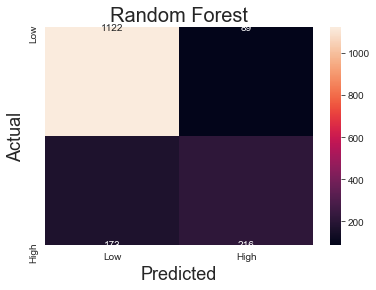

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

adult_model = RandomForestClassifier(n_estimators=10, random_state=0)

adult_model = adult_model.fit(d_train, l_train)

# Classify test data and display score and report
predicted = adult_model.predict(d_test)
score = 100.0 * metrics.accuracy_score(l_test, predicted)
print(f'Decision Tree Classification [Adult Data] Score = {score:4.1f}%\n')
print(f'Classification Report:\n {metrics.classification_report(l_test, predicted)}\n')
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, predicted)}')
confusion(l_test, predicted, ['Low', 'High'], title='Random Forest')

### Case Study 1
Let's assume that you work for a company that uses direct mail marketing to attract new customers. The target customers are high income people. Your company is doing well and has enough budget for direct mail marketing. So you want to reach out to as many high income people as you can and you don't mind that you send some mails to low income people in the process. 

You choose to use random forest classifier to pick high income class from the adult income dataset. Your goal is to achieve high true positive(TP), or high recall on positive class or high income class. On another word, you want to reduce false negative or type 2 error, and you have high tolerance on false positive or type 1 error. Another way to describe your goal is, you are willing to sacrifice positive precision to achive high positive recall.

In random forest classfier(or most classifiers in scikit learn model), there's a hyperparameter `class_weight` which determins weights associated with classes. By default all classes have same weight. For out goal, we can give positive class more weight to increase TP. Since there are only 25% high income class in the dataset, we can set `class_weight` to `balanced` which means give weights inversely proportional to class frequencies in the input data, or about 3 times more weight on high income class than low income class for this dataset. It is equivalent to set `class_weight={0:0.25, 1:0.75}`. This means the model is more likely to classify a data point to positive class or high income class. On another word, the change lowers the threshold to positive classification which leads to more false positive or type 1 error.

Following code cell demonstrate the result after this change. We can see that after setting `class_weight='balanced'`, comparing to the base model, this model gets:
1. lower accuracy score, accuracy drops from 83.6% to 82.5%;
2. higher trup positive(TP). TP counts increases from 216 to 226;
3. higher false positive(FP, type 1 error), FP or type 1 error increases from 89 to 117;
4. lower false negative(FN, type 2 error), FN or type 2 error drops from 173 to 163;
5. lower positive precision, positive precision drops from 0.71 to 0.66;
6. higher positive recall, positive recall increases from 0.56 to 0.58.

Even though the accuracy score drops, you achieve your goal to find more higher income earners.

Based on the new classification, you will send out total 117+226=343 direct mails and you successfully reached out 226 high income customers, more than 216 indicated by the base model. At the same time you send 117 letters to low income people, more than 89 indicated by the base model, but which you are ok with it due to adequate budget.

Decision Tree Classification [Adult Data] Score = 82.5%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      1211
           1       0.66      0.58      0.62       389

    accuracy                           0.82      1600
   macro avg       0.76      0.74      0.75      1600
weighted avg       0.82      0.82      0.82      1600




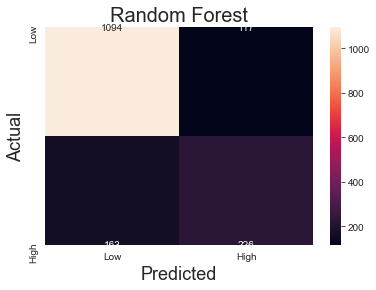

In [5]:
adult_model = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=0)

adult_model = adult_model.fit(d_train, l_train)

# Classify test data and display score and report
predicted = adult_model.predict(d_test)
score = 100.0 * metrics.accuracy_score(l_test, predicted)
print(f'Decision Tree Classification [Adult Data] Score = {score:4.1f}%\n')
print('Classification Report:\n {0}\n'.format(metrics.classification_report(l_test, predicted)))
confusion(l_test, predicted, ['Low', 'High'], title='Random Forest')

### Case Study 2
Now let's assume that you work for the same company but this time your company has limited budget for direct mail marketing. You goal is to use the budget more efficiently. You will reduce the total amount of email sent, but you want more proportion of the mails are sent to true high income people. You don't want to waste money to send mails to too many low income people.

You choose to use random forest classifier to pick high income class from the adult income dataset. Your goal is to achieve high precision on positive class or high income class, reduce false positive(FP). On another word, you want to reduce type 1 error, and you have high tolerance on false negative or type 2 error. Another way to describe your goal is, you are willing to sacrifice positive recall to achive high positive precision.

We will adjust hyperparameter `class_weight` to achieve the goal. This time we set less weight on positive rate so that the model is less likely to classify a data point as positive. On another word, the model will raise the threashold of positive class classification so a data point needs to be more *'positive'* to be classified as positive.

In the next code cell we set `class_weight={0:0.8, 1:0.2}`. The change lowers the threshold to negative classification which leads to more false negative or type 2 error.

Following code cell demonstrate the result after this change. We can see that after setting `class_weight={0:0.8, 1:0.2}`, comparing to the base model, this model gets:
1. Increase accuracy score a bit, accuracy drops from 83.6% to 83.9%;
2. lower trup positive(TP). TP counts increases from 216 to 208;
3. lower false positive(FP, type 1 error), FP or type 1 error drops from 89 to 76;
4. higher false negative(FN, type 2 error), FN or type 2 error increases from 173 to 181;
5. higher positive precision, positive precision increases from 0.71 to 0.73;
6. lower positive recall, positive recall drops from 0.56 to 0.53.

You achieve your goal to send more proportion of your mails to higher income earners.

Based on the new classification, you will send out total 76+208=284 direct mails, which is less than 89+216=305 indicated by the base model. 73% of mails sent are sent to true high income customers, more than 71% indicated by the base model. So you achieve your gold by sending out less mails, with higher proportion of them sent to true high income people.

Decision Tree Classification [Adult Data] Score = 83.9%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1211
           1       0.73      0.53      0.62       389

    accuracy                           0.84      1600
   macro avg       0.80      0.74      0.76      1600
weighted avg       0.83      0.84      0.83      1600




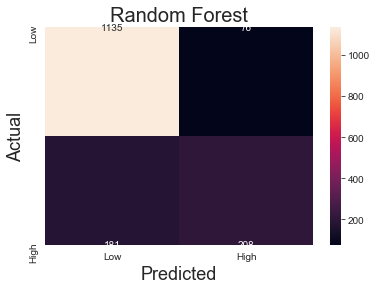

In [6]:
adult_model = RandomForestClassifier(n_estimators=10, class_weight={0:0.8, 1:0.2}, random_state=23)

adult_model = adult_model.fit(d_train, l_train)

# Classify test data and display score and report
predicted = adult_model.predict(d_test)
score = 100.0 * metrics.accuracy_score(l_test, predicted)
print(f'Decision Tree Classification [Adult Data] Score = {score:4.1f}%\n')
print('Classification Report:\n {0}\n'.format(metrics.classification_report(l_test, predicted)))
confusion(l_test, predicted, ['Low', 'High'], title='Random Forest')

-----

<font color='red' size = '5'> Student Exercise </font>

In above case studies, try set class_weight to other values to see what impact the changes have. What happens if you set class_weight to extreme values like `class_weight={0:1.0, 1:0.0}` or `class_weight={0:0.0, 1:1.0}`?

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Understanding [classification metrics](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019)

-----


**&copy; 2019: Gies College of Business at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode